# Data Mining II Project 
***
#### University of Pisa - Gabriele Leone, Federica Trevisan

# Alternative Classification methods
Test different classification methods over a simple classification problem. 

## Dataset
The UCI Abalone dataset, containing various features of abalones, including the age – to be inferred by the number or rings. 
https://archive.ics.uci.edu/ml/datasets/Abalone

- Number of Instances: 4177  
- Number of Attributes: 8  
- Missing Attribute Values: None



| Name | Data Type | Measurement Unit | Description |
|---| --- | --- |---|
| Sex | nominal | - | M, F, and I (infant)        |
| Length | continuous | mm | Longest shell measurement   |
| Diameter | continuous | mm | perpendicular to length     |
| Height | continuous | mm | with meat in shell          |
| Whole weight | continuous | grams | whole abalone               |
| Shucked weight | continuous | grams | weight of meat              |
| Viscera weight | continuous | grams | gut weight (after bleeding) |
| Shell weight | continuous | grams | after being dried           |
| Rings | integer | -- | +1.5 gives the age in years |

## Objective 
- discard the “Infant” abalones; 
- discretize the attribute “Number of rings” into 2 classes; 
- try at least 3 different classification methods (among those discussed in DM2, including ensemble methods) on the resulting dataset, using the discretized n. of rings as class, and evaluating them with cross-validation.

Predicting the age of abalone from physical measurements.  The age of
   abalone is determined by cutting the shell through the cone, staining it,
   and counting the number of rings through a microscope -- a boring and
   time-consuming task.  Other measurements, which are easier to obtain, are
   used to predict the age.  Further information, such as weather patterns
   and location (hence food availability) may be required to solve the problem.



   From the original data examples with missing values were removed (the
   majority having the predicted value missing), and the ranges of the
   continuous values have been scaled for use with an ANN (by dividing by 200).

   Data comes from an original (non-machine-learning) study


In [18]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [3]:
abalone_data = pd.read_csv("abalone_dataset.csv")
abalone_data.dtypes

sex                object
length            float64
diameter          float64
height            float64
weight_whole      float64
weight_shucked    float64
weight_viscera    float64
weight_shell      float64
rings               int64
dtype: object

## Data Understanding

In [5]:
abalone_data.head()

,sex,length,diameter,height,weight_whole,weight_shucked,weight_viscera,weight_shell,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
abalone_data.describe()

,length,diameter,height,weight_whole,weight_shucked,weight_viscera,weight_shell,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [17]:
abalone_data.corr()

,length,diameter,height,weight_whole,weight_shucked,weight_viscera,weight_shell,rings
length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
weight_whole,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
weight_shucked,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
weight_viscera,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
weight_shell,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


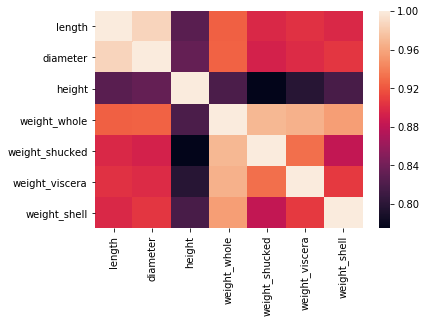

In [25]:
# load the Abalone dataset, dropping the rings column
abalone_data_no_rings = abalone_data.drop('rings', axis = 1)
# calculate the correlation matrix
corr = abalone_data_no_rings.corr()
# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

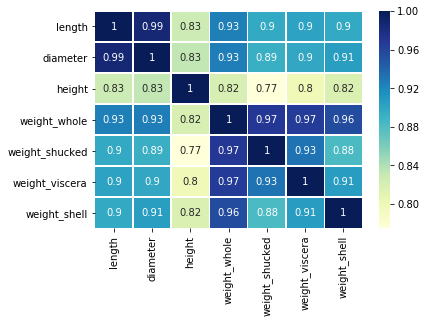

In [22]:
# load the Abalone dataset, dropping the rings column
abalone_data_no_rings = abalone_data.drop('rings', axis = 1)
# calculate the correlation matrix
corr = abalone_data_no_rings.corr()
# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu", 
            linewidths=.5, annot=True,)
plt.show()

In [28]:
abalone_data['sex'].unique()

array(['M', 'F', 'I'], dtype=object)

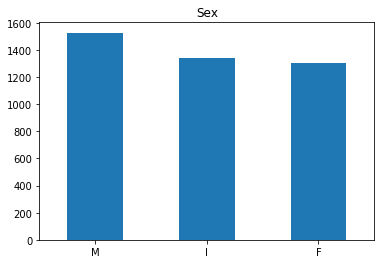

In [29]:
abalone_data['sex'].value_counts().plot(kind='bar', title='Sex')
plt.xticks(rotation=0)
plt.show()

# Discard the Infants

In [31]:
abalone_data_mf = abalone_data[abalone_data.sex != 'I']

In [34]:
abalone_data_mf['sex'].unique()

array(['M', 'F'], dtype=object)

In [32]:
abalone_data_mf.head()

,sex,length,diameter,height,weight_whole,weight_shucked,weight_viscera,weight_shell,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20


In [36]:
abalone_data_mf.describe()

,length,diameter,height,weight_whole,weight_shucked,weight_viscera,weight_shell,rings
count,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000
mean,0.569552,0.446407,0.154437,1.016849,0.439051,0.222526,0.291208,10.900882
std,0.095821,0.078850,0.037421,0.453217,0.212193,0.101880,0.128835,3.069252
min,0.155000,0.110000,0.015000,0.015500,0.006500,0.003000,0.005000,3.000000
25%,0.515000,0.400000,0.135000,0.701250,0.287000,0.152000,0.202500,9.000000
50%,0.585000,0.460000,0.155000,1.003000,0.431500,0.217000,0.285000,10.000000
75%,0.635000,0.500000,0.175000,1.289500,0.568750,0.287500,0.365000,12.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# Rings Binarization
rings < 11  
rings >= 11

In [54]:
abalone_data_mf['rings'].unique()

[0]
Categories (1, int64): [0]